
# **Problem Statement**

### **Predicting Turbine Energy Yield (TEY) using ambient variables as features.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [ ]:
df=pd.read_csv('gas_turbines.csv')
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [ ]:
df.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [ ]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
print('Shape of dataset before dropping duplicates:',df.shape)

Shape of dataset before dropping duplicates: (15039, 11)


In [ ]:
df.drop_duplicates(keep=False,inplace=True)

In [ ]:

print('Shape of dataset after dropping duplicates:',df.shape)

Shape of dataset after dropping duplicates: (15039, 11)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


In [ ]:
df.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [ ]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [ ]:
df.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [ ]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

## **Data Visualization**

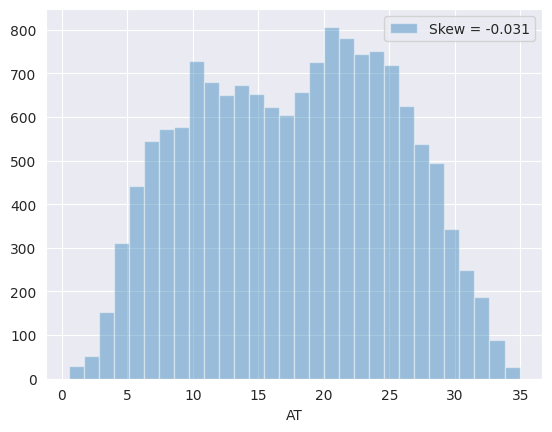

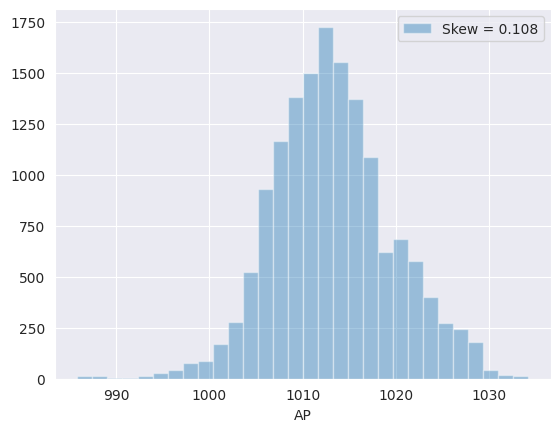

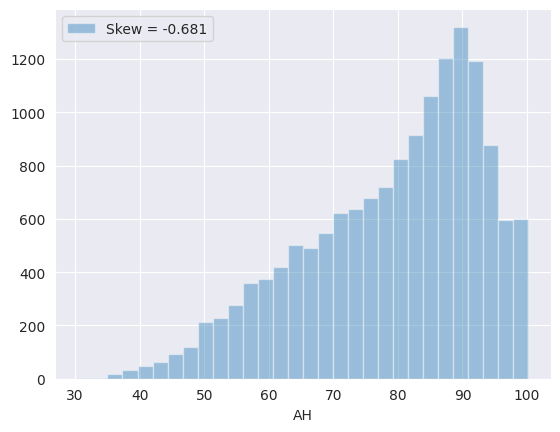

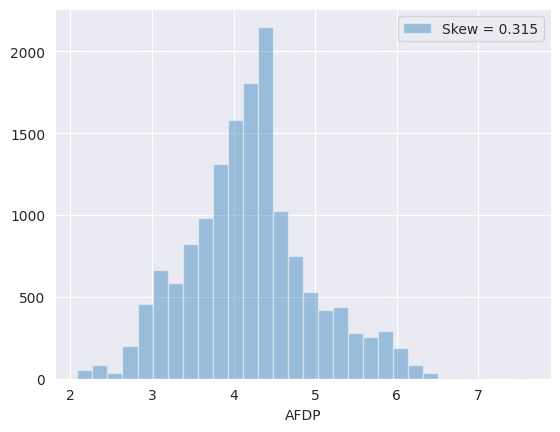

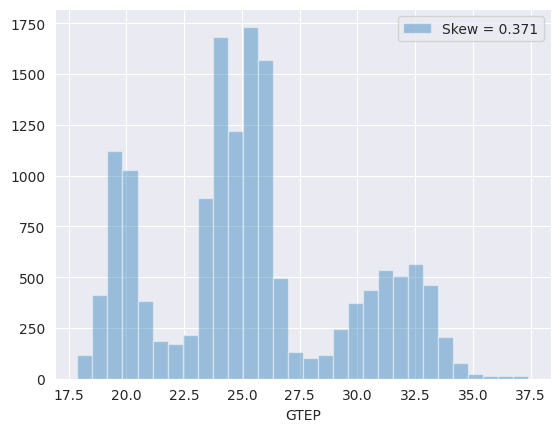

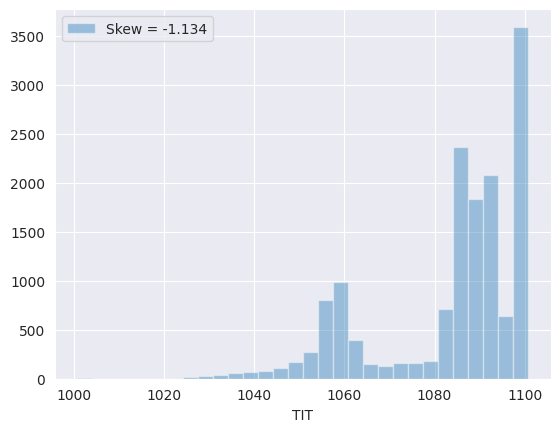

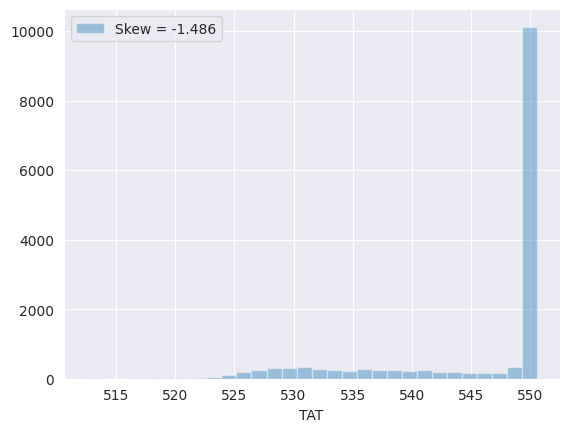

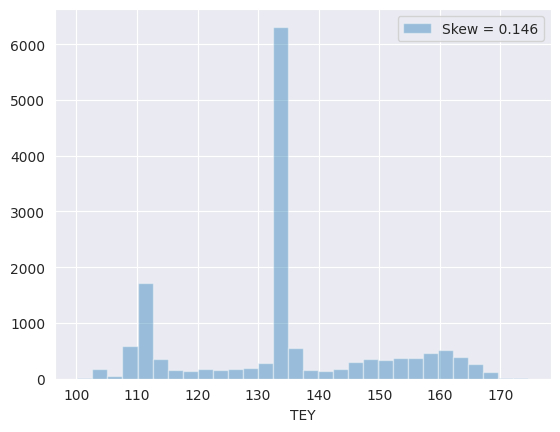

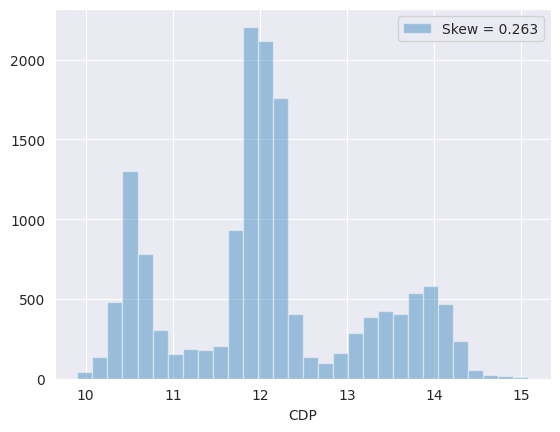

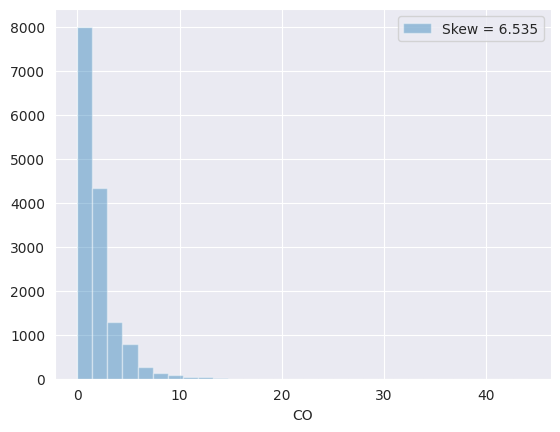

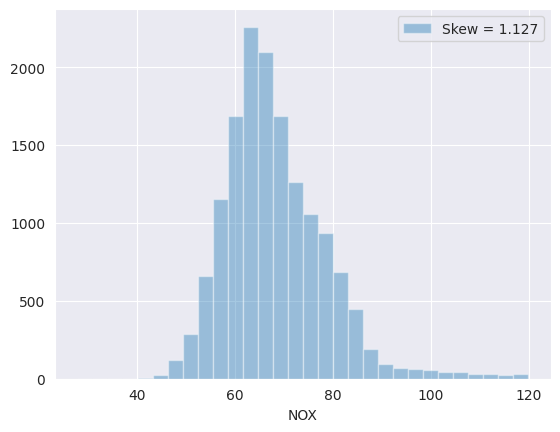

In [ ]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [ ]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))


The dataset contains 1543 observations with more than 2 outliers


In [ ]:
numerical_features

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

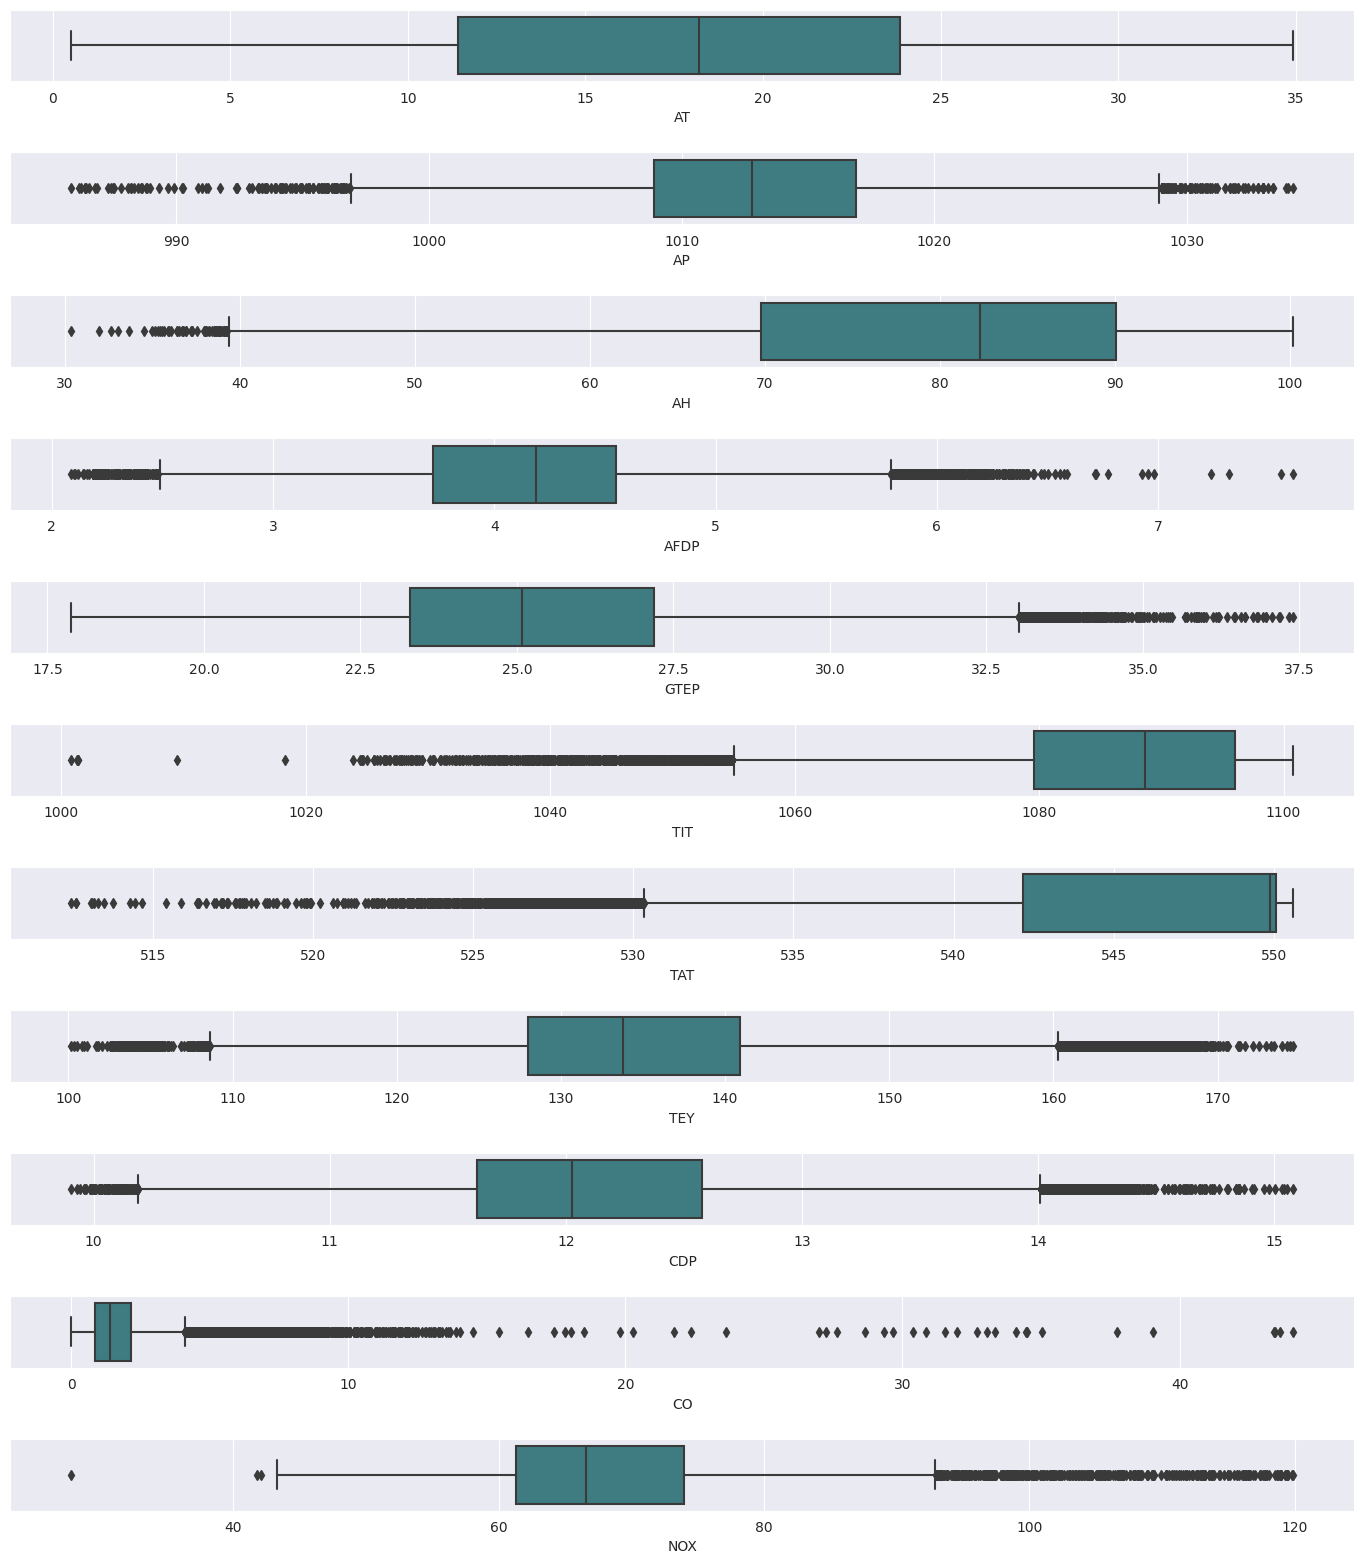

In [ ]:
ot=df.copy()
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

<Axes: >

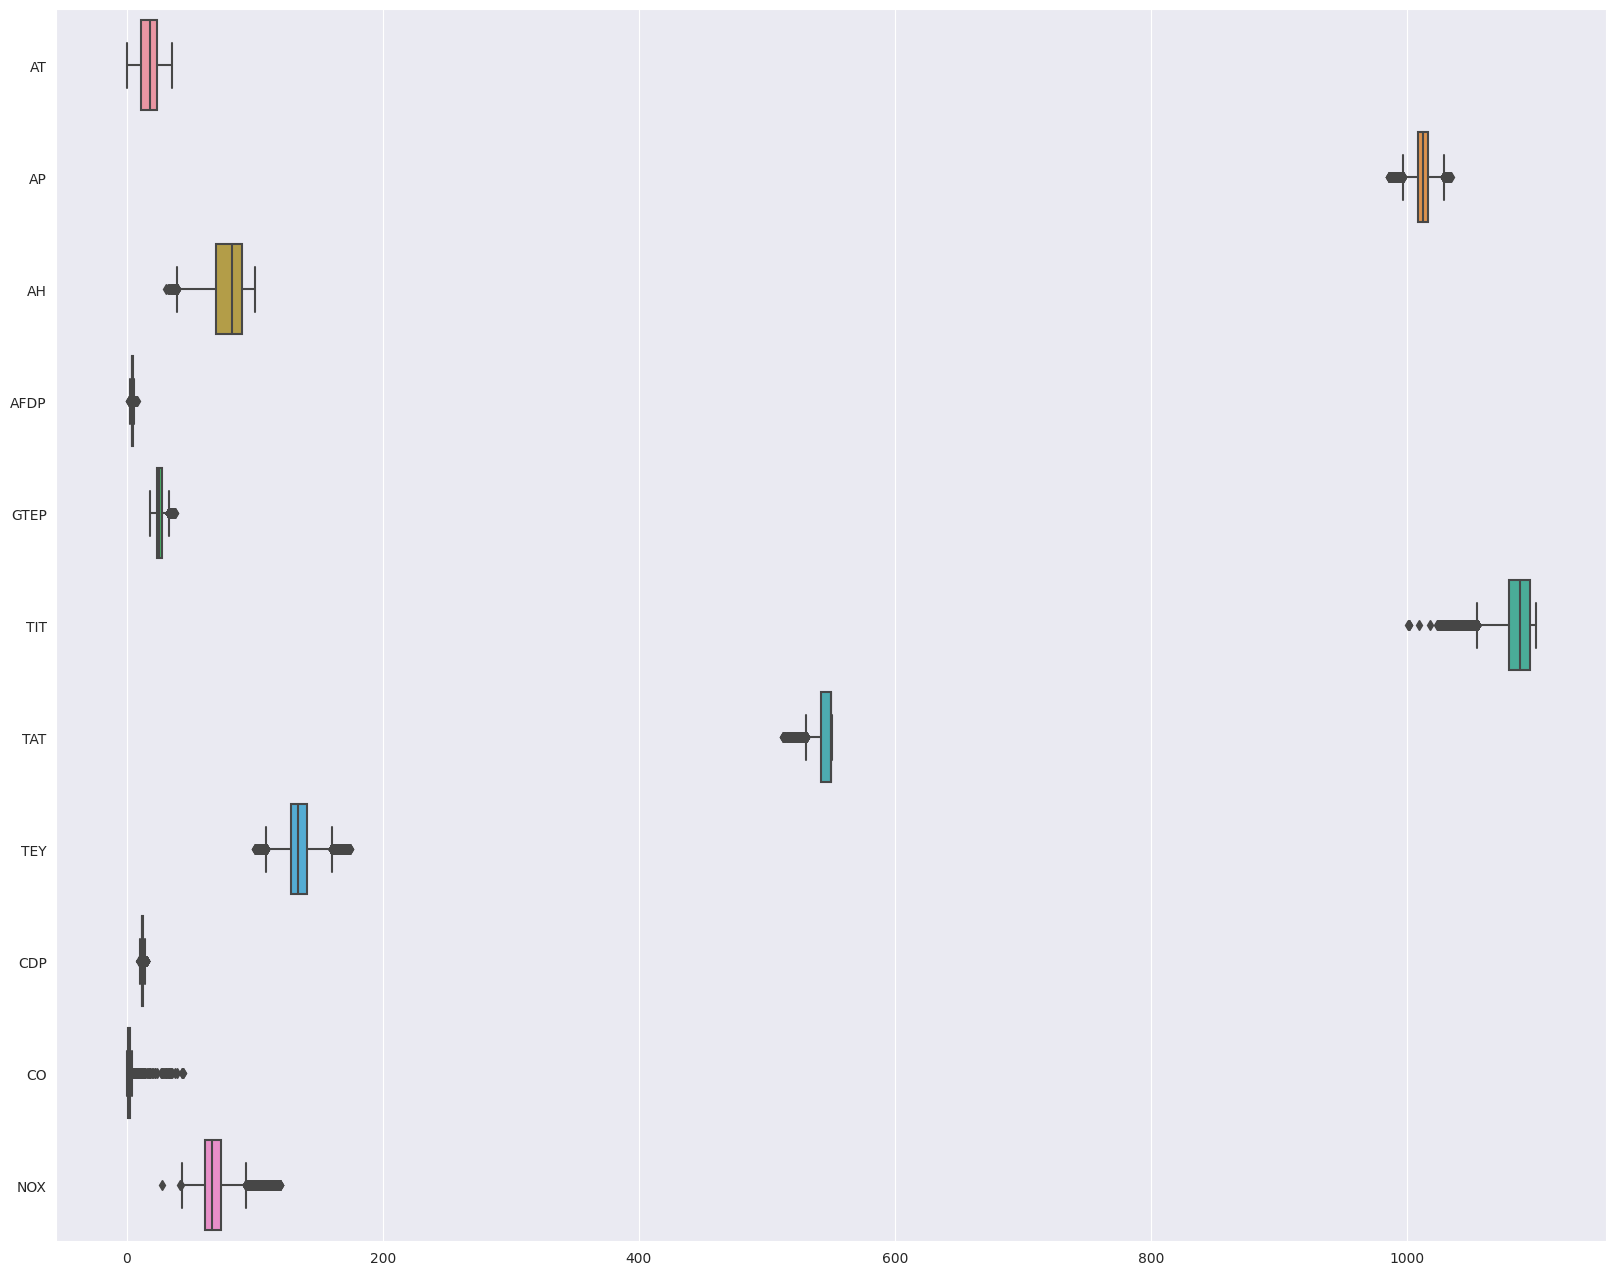

In [ ]:
#outlier
plt.figure(figsize=(20,16))
sns.boxplot(data=df[numerical_features], orient="h")

Text(0.5, 1.0, 'Histogram of the Target Column')

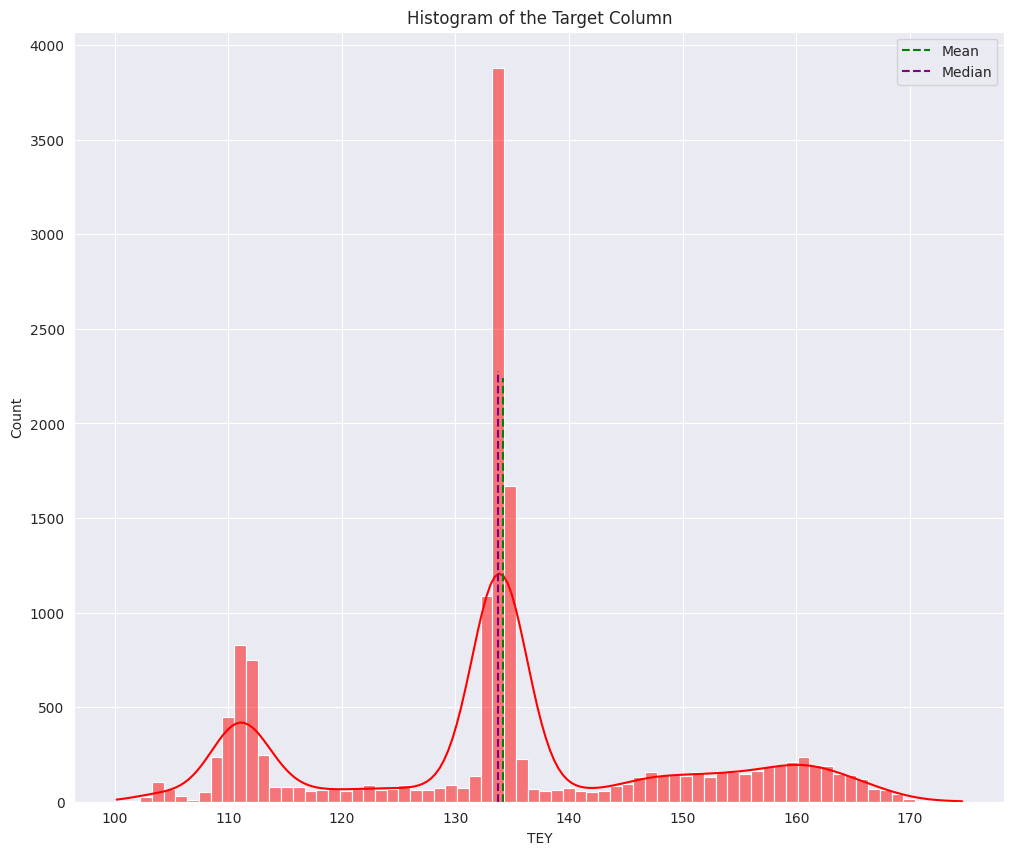

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="TEY",color="red",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

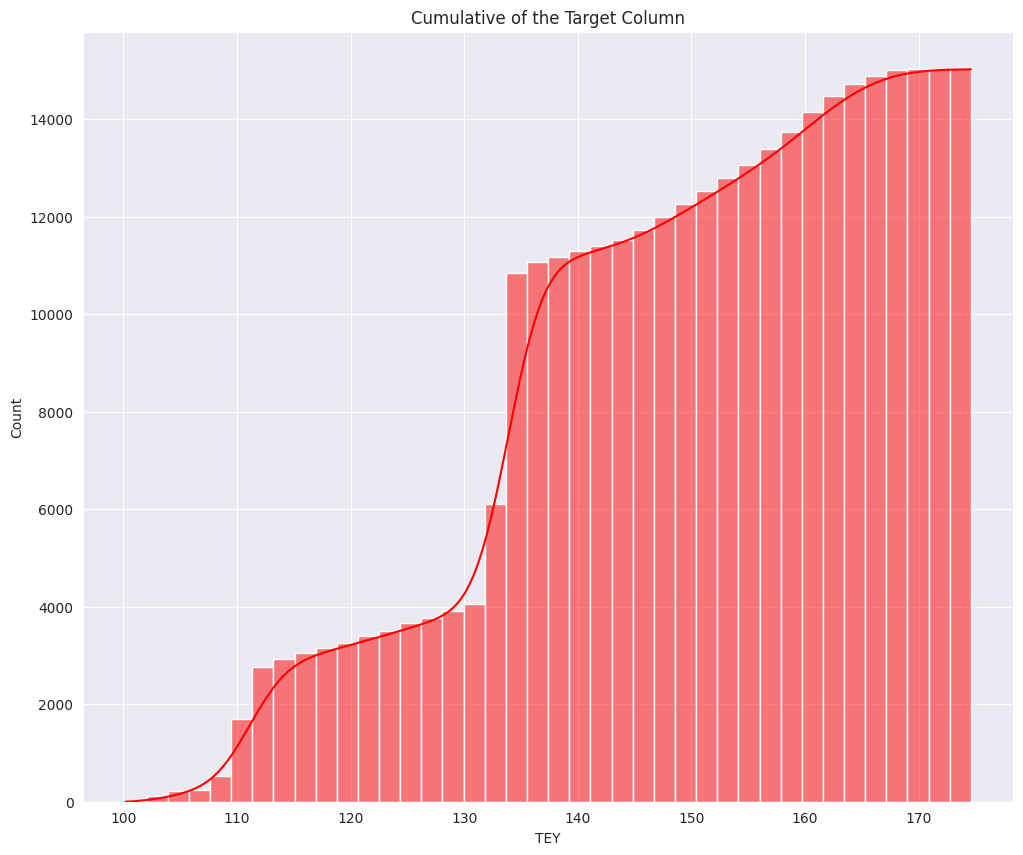

In [ ]:
plt.figure(figsize = (12,10))
sns.histplot(df["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

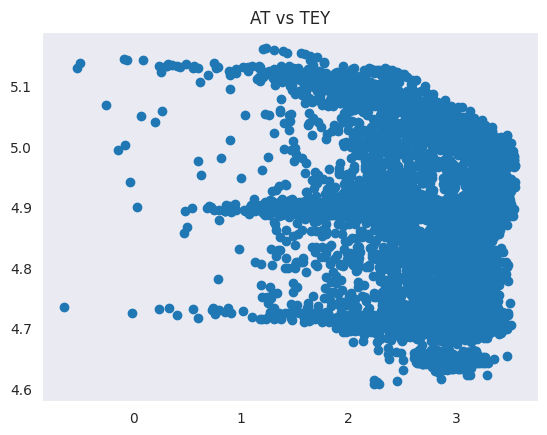

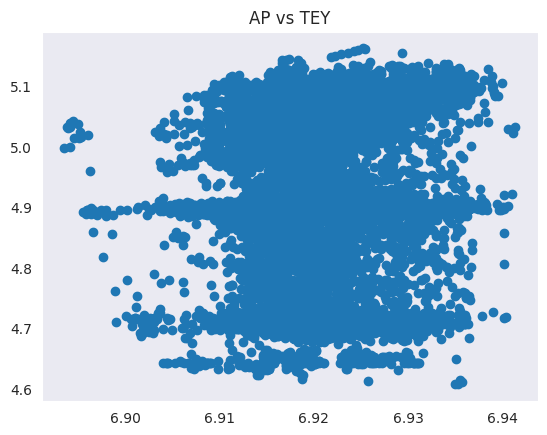

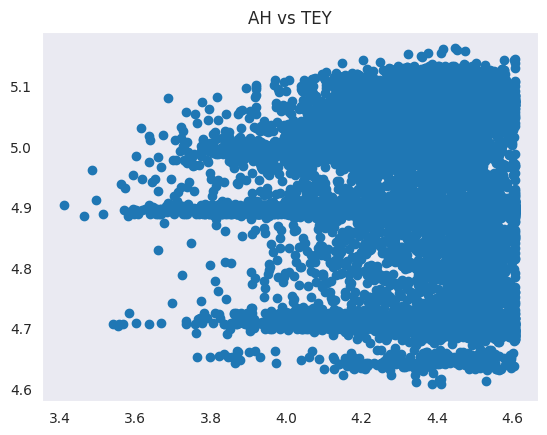

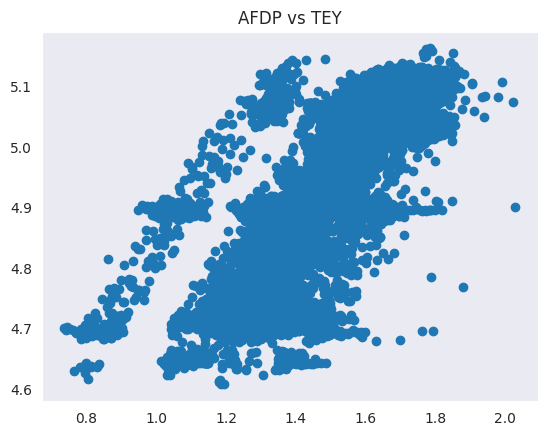

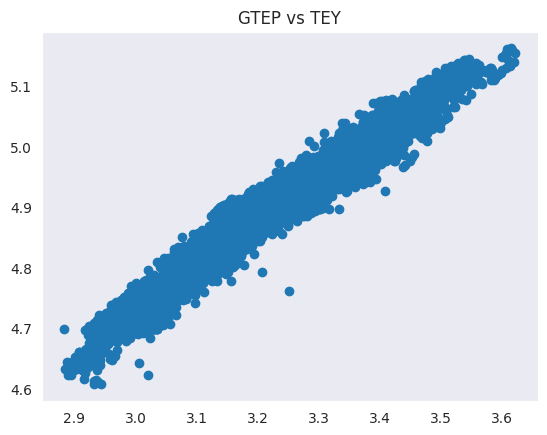

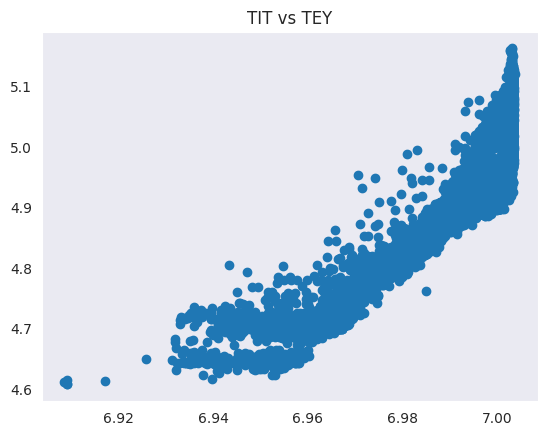

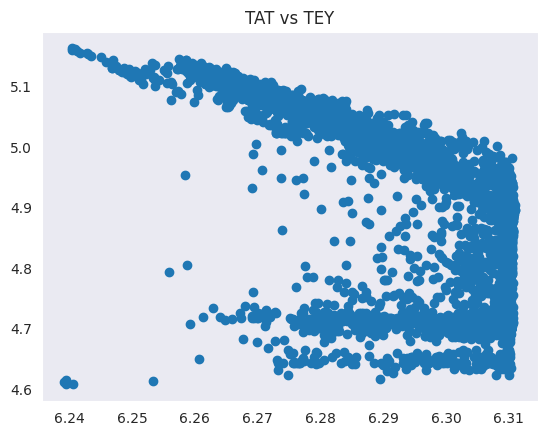

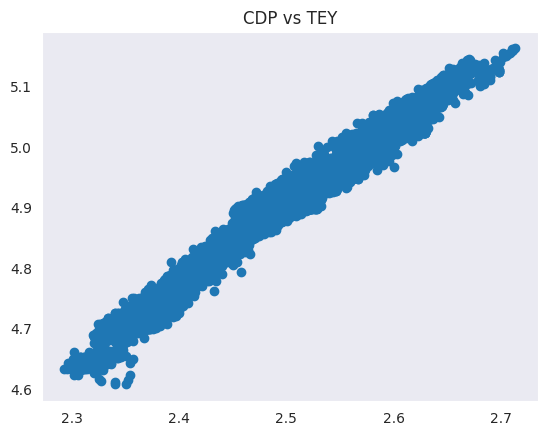

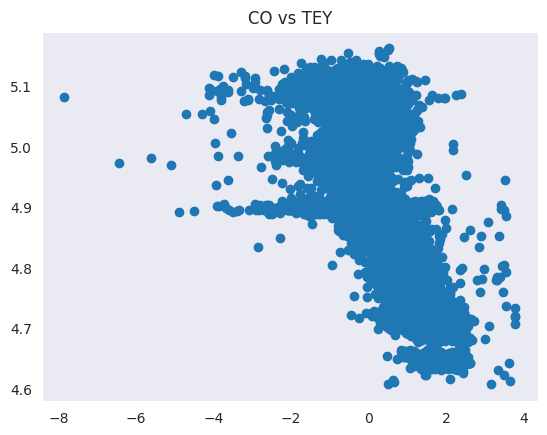

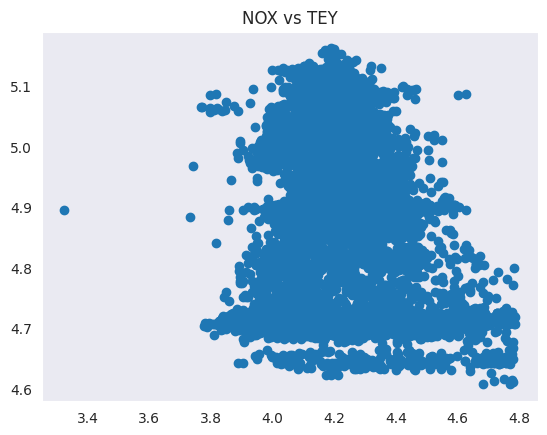

In [ ]:
#Multivariate analysis
for i in df.columns:
    if i!="TEY":
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

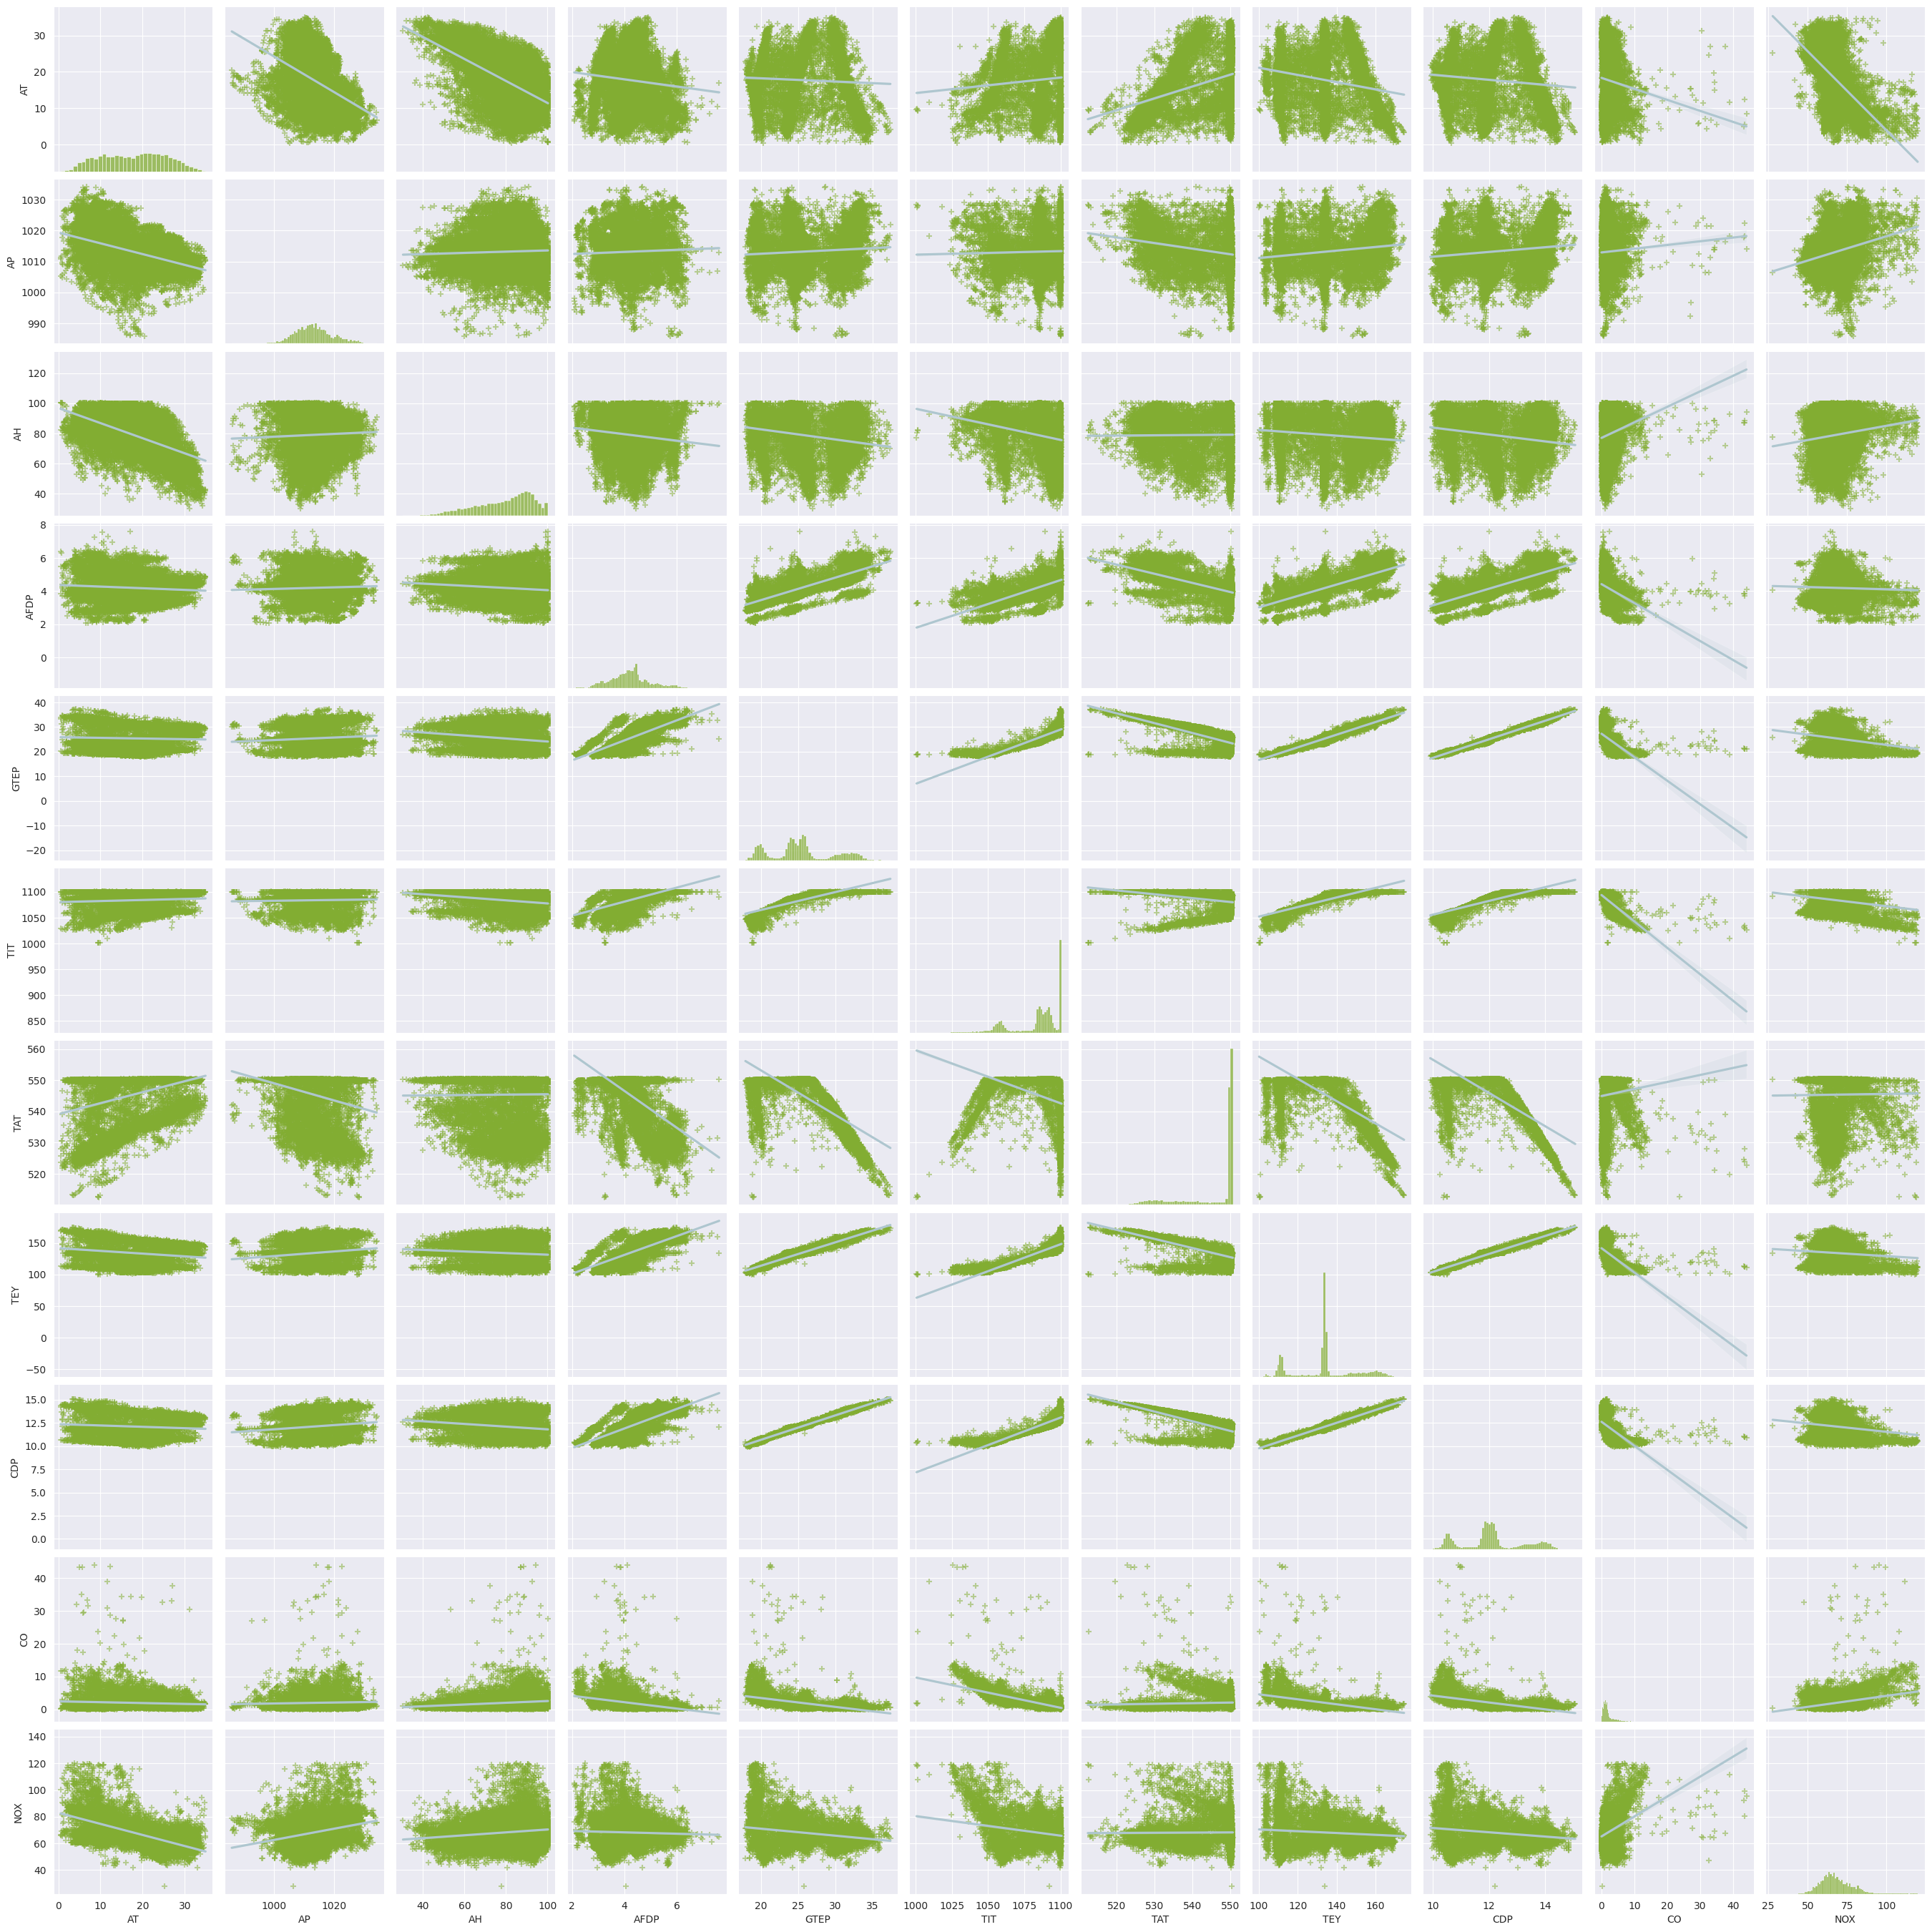

In [ ]:

sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},

                 diag_kws= {'color': '#82ad32'})

<Figure size 2000x2000 with 0 Axes>

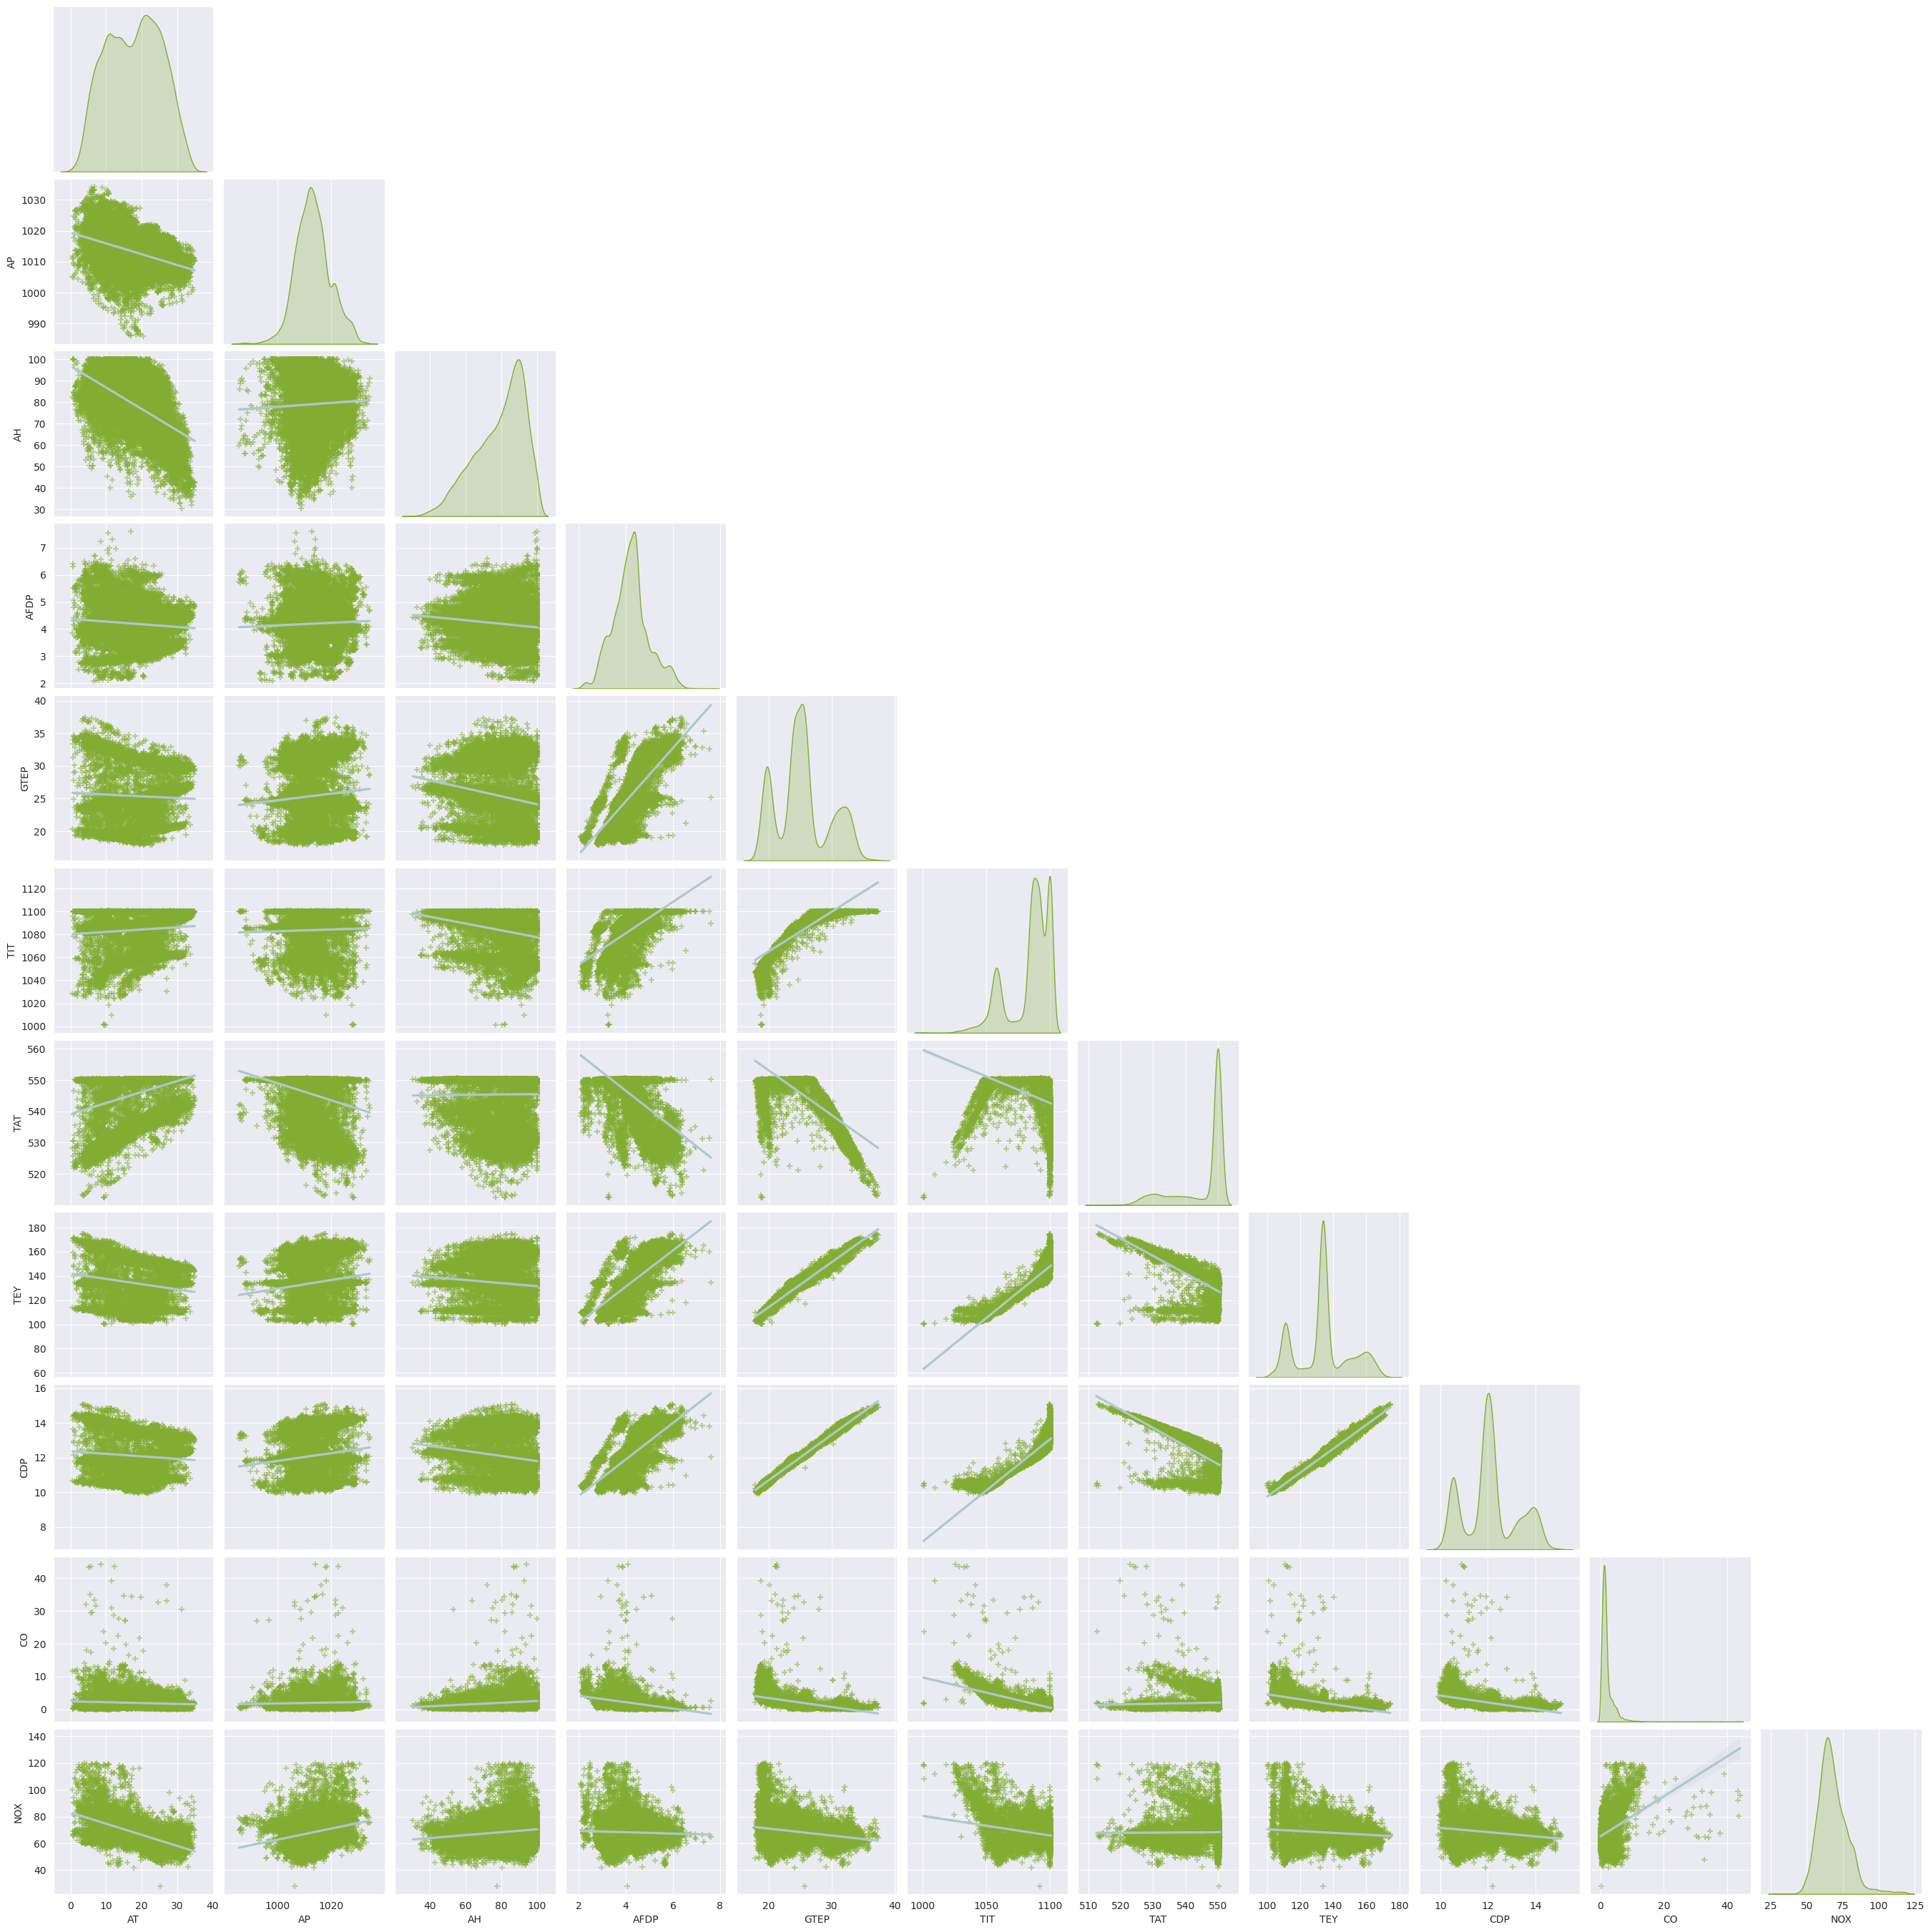

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})

<Axes: >

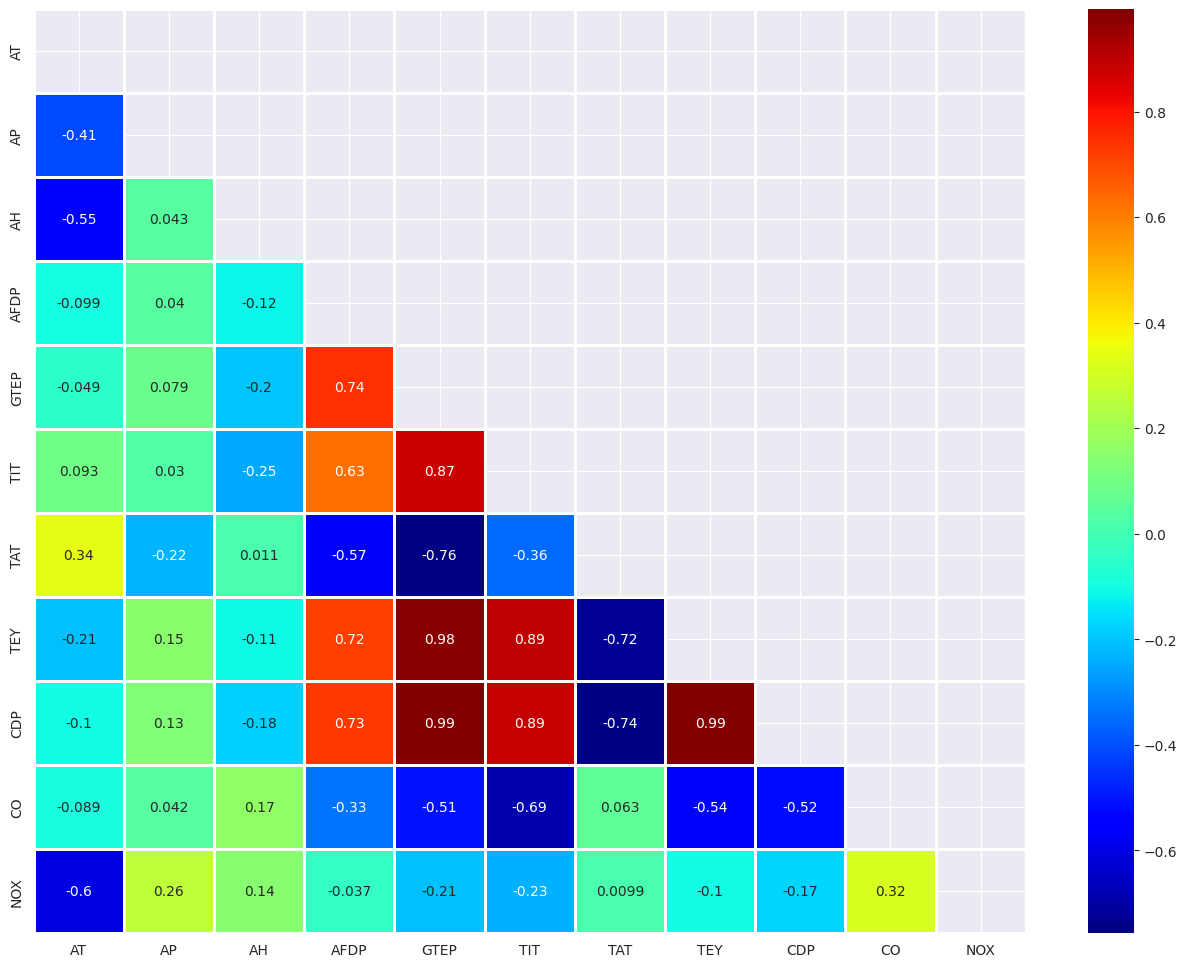

In [ ]:
# Having a look at the correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)


In [ ]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

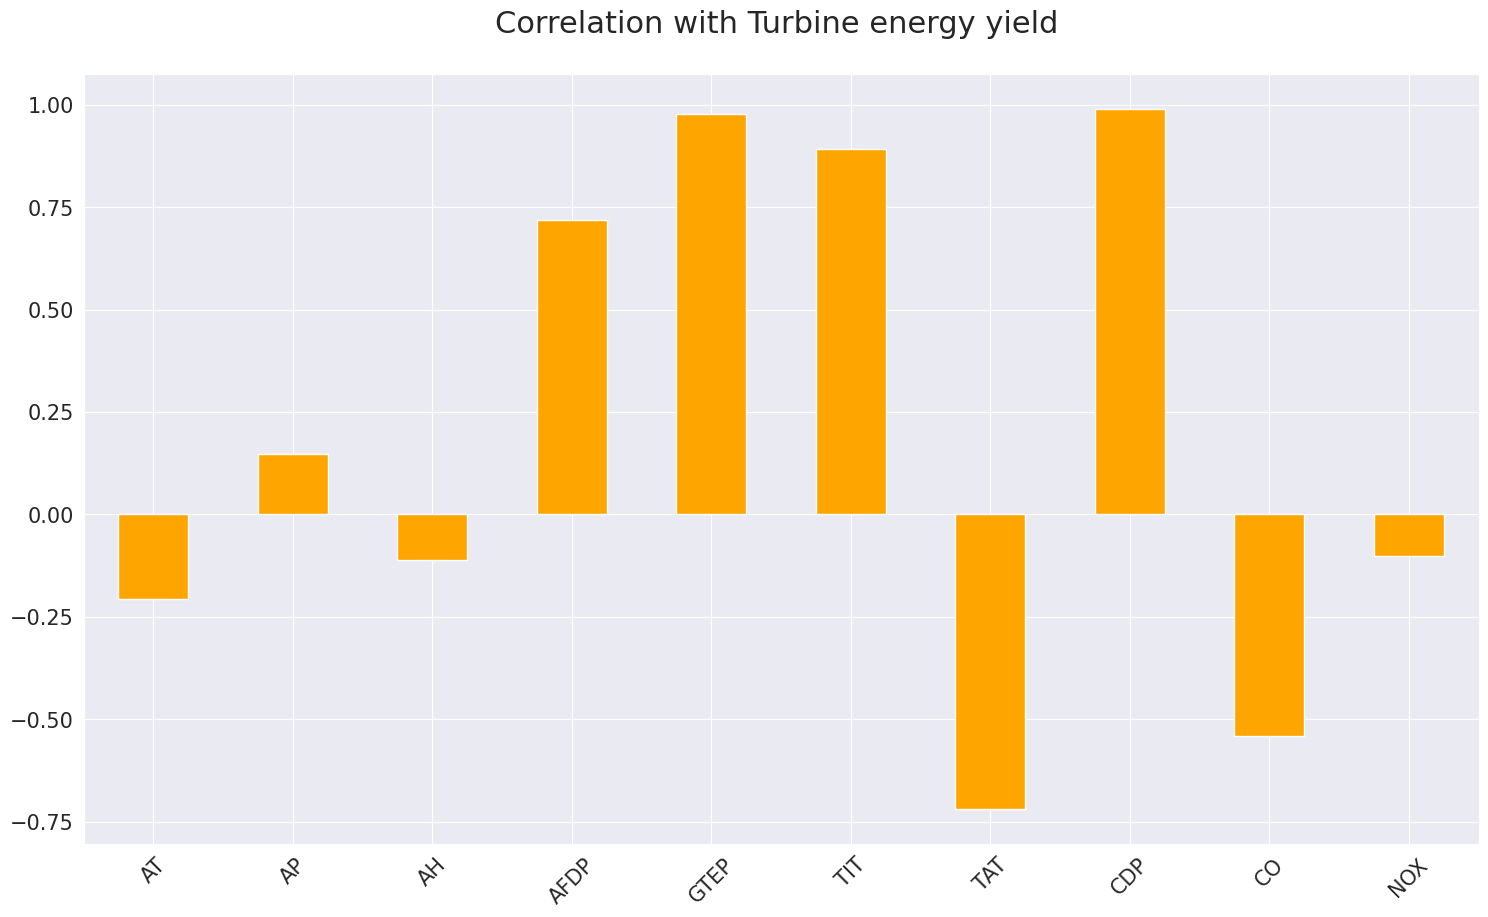

In [ ]:
data2 = df.copy()

correlations = data2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

## **Feature Selection Technique**

In [ ]:
#Feature importance
from numpy import set_printoptions

In [ ]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

# Assuming x and y are your feature matrix and target variable
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)


In [ ]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [ ]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score Feature
7  1.712638     CDP
4  1.600017    GTEP
5  1.323603     TIT
6  0.892953     TAT
3  0.660147    AFDP
8  0.512943      CO
0  0.412077      AT
9  0.300647     NOX
1  0.138593      AP
2  0.097723      AH

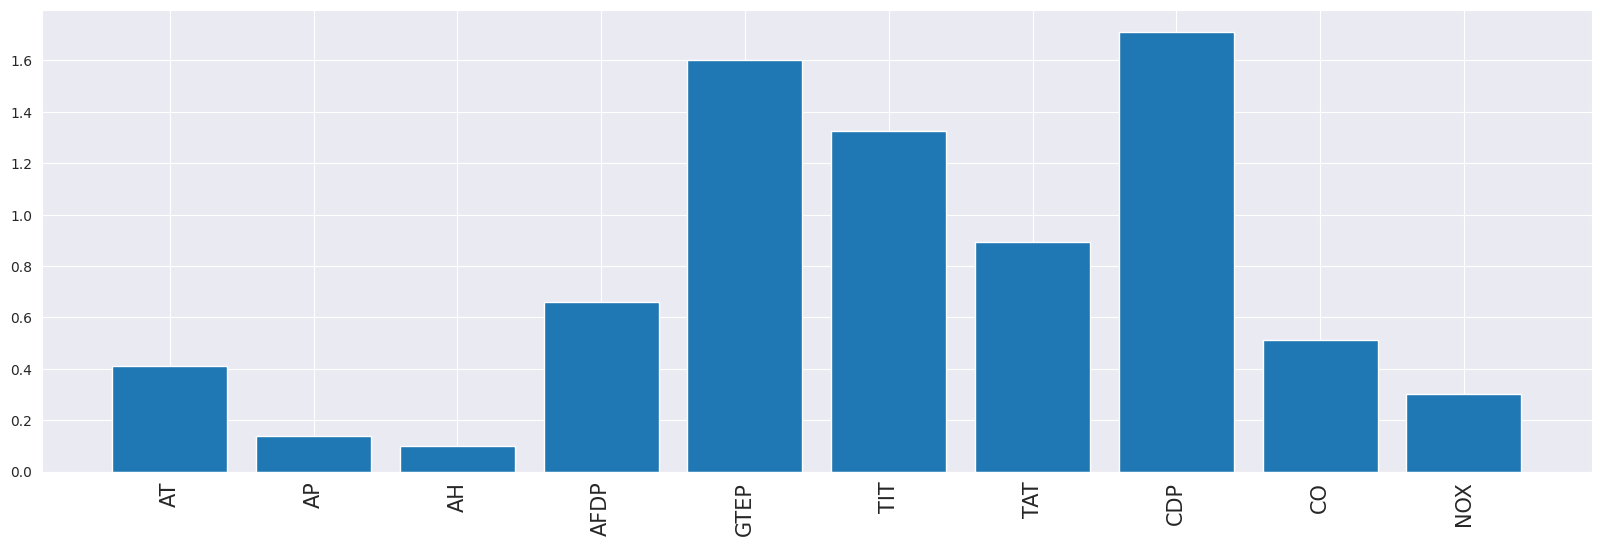

In [ ]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

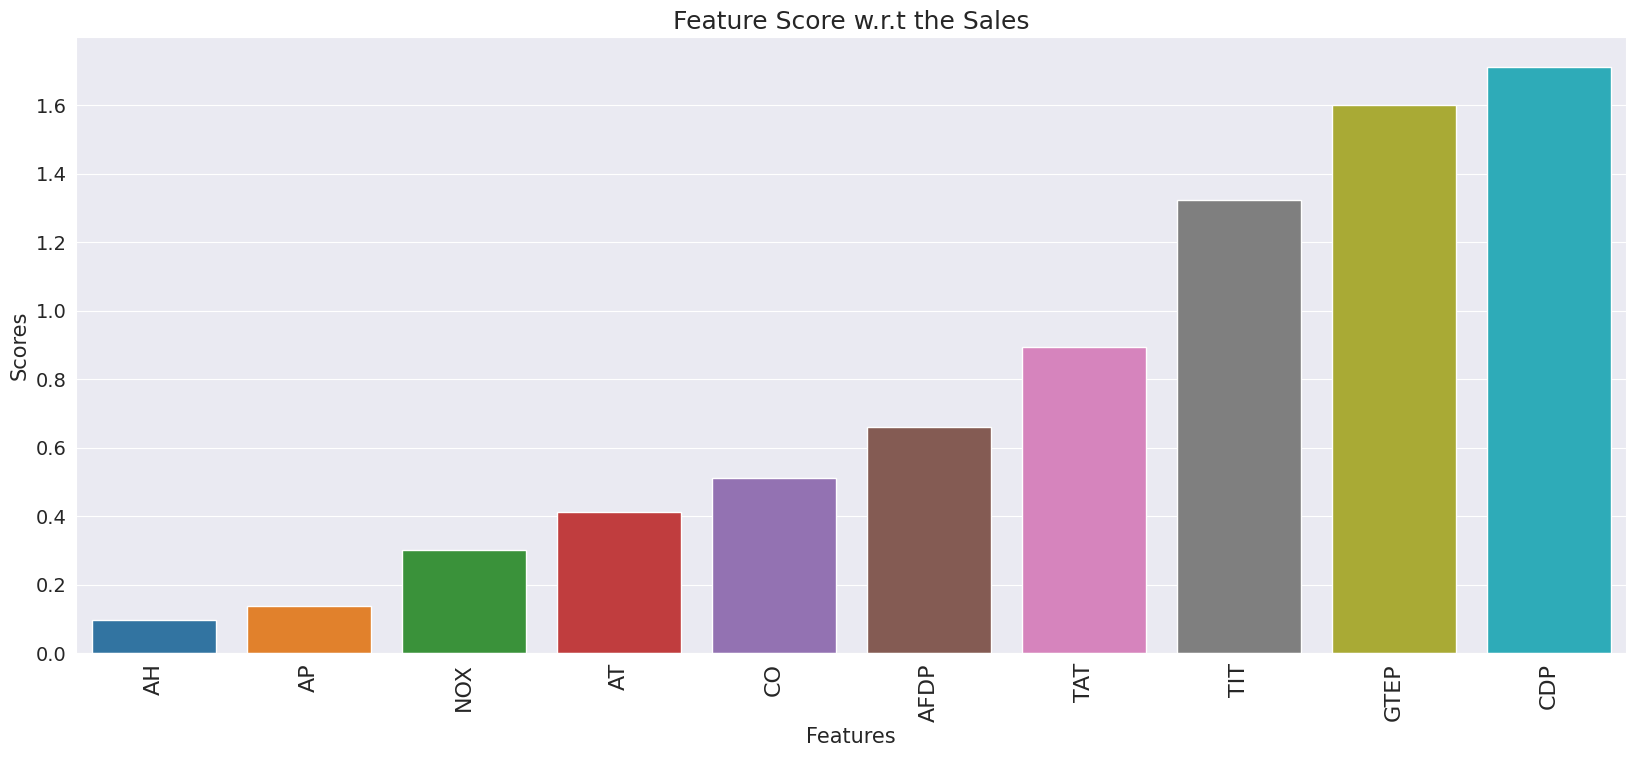

In [ ]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score",
            data=score_df,
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [ ]:
score_df.sort_values('Score',ascending=False)

Score Feature
7  1.712638     CDP
4  1.600017    GTEP
5  1.323603     TIT
6  0.892953     TAT
3  0.660147    AFDP
8  0.512943      CO
0  0.412077      AT
9  0.300647     NOX
1  0.138593      AP
2  0.097723      AH

In [ ]:
model_data = df[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

CDP    GTEP     TIT     TAT    AFDP      CO      AT     TEY
0  10.605  19.663  1059.2  550.00  3.5000  3.1547  6.8594  114.70
1  10.598  19.728  1059.3  550.00  3.4998  3.2363  6.7850  114.72
2  10.601  19.779  1059.4  549.87  3.4824  3.2012  6.8977  114.71
3  10.606  19.792  1059.6  549.99  3.4805  3.1923  7.0569  114.72
4  10.612  19.765  1059.7  549.98  3.4976  3.2484  7.3978  114.72

## **Data Pre-Processing**

Deal with missing data

In [ ]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [65]:

df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

CDP      GTEP       TIT       TAT      AFDP        CO        AT  \
0 -1.357331 -1.379101 -1.488376  0.585240 -0.921232  0.532012 -1.439778   
1 -1.363676 -1.363528 -1.482325  0.585240 -0.921495  0.568733 -1.449601   
2 -1.360957 -1.351309 -1.476275  0.568715 -0.944385  0.552938 -1.434721   
3 -1.356424 -1.348194 -1.464173  0.583969 -0.946884  0.548933 -1.413702   
4 -1.350985 -1.354663 -1.458123  0.582698 -0.924389  0.574179 -1.368693   

        TEY  
0 -1.231172  
1 -1.229909  
2 -1.230541  
3 -1.229909  
4 -1.229909

Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [67]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)


Mean
 CDP     0.0
GTEP   -0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT      0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


### Test Train Split With Imbalanced Dataset

In [68]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [69]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)


## Hyperparameter Tuning

In [70]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [73]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.1 MB/s eta 0:00:00


In [74]:
from kerastuner.tuners import RandomSearch

tuner = RandomSearch(build_model, objective='val_mean_absolute_error', max_trials=5, executions_per_trial=3, directory='project', project_name='Gas Turbine')
tuner.search_space_summary()


Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [76]:
tuner.search(x_train, y_train,epochs=10,validation_data=(x_test, y_test))

Trial 5 Complete [00h 01m 02s]
val_mean_absolute_error: 0.027573057760794956

Best val_mean_absolute_error So Far: 0.027573057760794956
Total elapsed time: 00h 13m 24s


In [78]:

tuner.results_summary()

Results summary
Results in project/Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 4 summary
Hyperparameters:
num_layers: 5
units_0: 96
units_1: 96
learning_rate: 0.0001
units_2: 64
units_3: 64
units_4: 64
units_5: 64
units_6: 64
units_7: 96
units_8: 64
units_9: 32
units_10: 96
units_11: 64
units_12: 64
units_13: 96
units_14: 64
units_15: 32
units_16: 64
units_17: 64
units_18: 64
units_19: 32
Score: 0.027573057760794956

Trial 2 summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 64
units_4: 64
units_5: 64
units_6: 32
units_7: 96
units_8: 96
units_9: 32
units_10: 32
units_11: 96
units_12: 96
units_13: 64
units_14: 96
units_15: 32
units_16: 96
units_17: 32
units_18: 96
units_19: 64
Score: 0.02868472660581271

Trial 0 summary
Hyperparameters:
num_layers: 10
units_0: 96
units_1: 64
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32

### Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [79]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))

    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

## Model Building Neural Networks

Standardizing only predictor variable - after train test split

In [90]:
model_data

CDP    GTEP     TIT     TAT    AFDP      CO      AT     TEY
0      10.605  19.663  1059.2  550.00  3.5000  3.1547  6.8594  114.70
1      10.598  19.728  1059.3  550.00  3.4998  3.2363  6.7850  114.72
2      10.601  19.779  1059.4  549.87  3.4824  3.2012  6.8977  114.71
3      10.606  19.792  1059.6  549.99  3.4805  3.1923  7.0569  114.72
4      10.612  19.765  1059.7  549.98  3.4976  3.2484  7.3978  114.72
...       ...     ...     ...     ...     ...     ...     ...     ...
15034  10.400  19.164  1049.7  546.21  3.5421  4.5186  9.0301  111.61
15035  10.433  19.414  1046.3  543.22  3.5059  4.8470  7.8879  111.78
15036  10.483  19.530  1037.7  537.32  3.4770  7.9632  7.2647  110.19
15037  10.533  19.377  1043.2  541.24  3.4486  6.2494  7.0060  110.74
15038  10.583  19.306  1049.9  545.85  3.4275  4.9816  6.9279  111.58

[15039 rows x 8 columns]

In [91]:
#assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

#for removing heading from y_test
#y_test = y_test.values

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [92]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)


Epoch 1/100
169/169 [==============================] - 3s 5ms/step - loss: 17630.3086 - mae: 131.8092 - mse: 17630.3086 - val_loss: 16785.2793 - val_mae: 128.5973 - val_mse: 16785.2793
Epoch 2/100
169/169 [==============================] - 0s 3ms/step - loss: 16288.9990 - mae: 126.6326 - mse: 16288.9990 - val_loss: 15732.6504 - val_mae: 124.4373 - val_mse: 15732.6504
Epoch 3/100
169/169 [==============================] - 1s 3ms/step - loss: 15313.8896 - mae: 122.7269 - mse: 15313.8896 - val_loss: 14814.2822 - val_mae: 120.6909 - val_mse: 14814.2822
Epoch 4/100
169/169 [==============================] - 0s 3ms/step - loss: 14429.5801 - mae: 119.0667 - mse: 14429.5801 - val_loss: 13962.1055 - val_mae: 117.1073 - val_mse: 13962.1055
Epoch 5/100
169/169 [==============================] - 0s 3ms/step - loss: 13601.2090 - mae: 115.5357 - mse: 13601.2090 - val_loss: 13158.4307 - val_mae: 113.6242 - val_mse: 13158.4307
Epoch 6/100
169/169 [==============================] - 0s 3ms/step - loss: 

In [93]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):

    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]

    bestParamTable = pd.DataFrame()

    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:

            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))

            # The output neuron is a single fully connected node
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')

            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))

            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))

            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable


94/94 [==============================] - 1s 5ms/step
batch_size: 5 - epochs: 5 Accuracy: TEY    97.918519
dtype: float64
94/94 [==============================] - 0s 3ms/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.552257
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.556783
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.670363
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 5 Accuracy: TEY    81.05836
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.27222
dtype: float64
94/94 [==============================] - 1s 5ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.67266
dtype: float64
94/94 [==============================] - 0s 1ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.607644
dtype: float64
94/94 [================

batchsize  epochs                         Accuracy
0          5       5  TEY    97.918519
dtype: float64
0          5      10  TEY    99.552257
dtype: float64
0          5      50  TEY    99.556783
dtype: float64
0          5     100  TEY    99.670363
dtype: float64
0         10       5   TEY    81.05836
dtype: float64
0         10      10   TEY    98.27222
dtype: float64
0         10      50   TEY    99.67266
dtype: float64
0         10     100  TEY    99.607644
dtype: float64
0         15       5  TEY    58.846527
dtype: float64
0         15      10  TEY    89.840668
dtype: float64
0         15      50  TEY    99.533956
dtype: float64
0         15     100  TEY    99.708332
dtype: float64
0         20       5  TEY    45.911844
dtype: float64
0         20      10  TEY    80.970209
dtype: float64
0         20      50  TEY    99.649606
dtype: float64
0         20     100  TEY    99.605671
dtype: float64

In [96]:
#Training Model - using best params
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

## Predicting values from Model using same dataset

In [99]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled)

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 1ms/step
(3008, 9)


CDP    GTEP     TIT     TAT    AFDP        CO       AT  Actual  \
13312  12.219  25.762  1092.5  550.25  4.0023   1.26430  24.0930  134.46   
12627  10.791  20.085  1059.6  549.94  3.2106   2.69370  20.4500  111.88   
6393   12.126  25.221  1089.9  549.62  4.5325   1.96250  20.2620  133.72   
4990   12.218  25.965  1092.9  549.96  4.4266   1.57120  26.8620  133.79   
12462  10.466  19.688  1056.9  550.01  3.1241   2.29960  19.4090  110.77   
7405   10.624  19.387  1058.9  550.17  3.3709   4.27640   2.2158  113.32   
10993  12.088  25.392  1089.7  550.11  3.7871   0.83578  23.8520  133.77   
9488   11.498  23.225  1079.4  549.60  4.2837   2.01980  12.3950  128.98   
14201  13.971  32.518  1100.1  528.98  5.1559   0.87760  12.3590  159.42   
9757   13.862  32.105  1100.0  530.69  5.9309  10.75000   8.6376  161.86   

        Predicted  
13312  134.521317  
12627  112.624954  
6393   134.187241  
4990   133.932053  
12462  111.183853  
7405   114.230759  
10993  133.626221  
9488   129.233536  
14201  160.616135  
9757   161.180695

In [100]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)


## Calculating Absolute Percent Error and Error

In [101]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.68465029483825


Actual   Predicted     APE %
13312  134.46  134.521317  0.045602
12627  111.88  112.624954  0.665851
6393   133.72  134.187241  0.349417
4990   133.79  133.932053  0.106176
12462  110.77  111.183853  0.373615

In [102]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

Actual   Predicted     APE %     Error
0     134.46  134.521317  0.045602 -0.000456
1     111.88  112.624954  0.665851 -0.006659
2     133.72  134.187241  0.349417 -0.003494
3     133.79  133.932053  0.106176 -0.001062
4     110.77  111.183853  0.373615 -0.003736
...      ...         ...       ...       ...
3003  119.25  119.744034  0.414284 -0.004143
3004  133.74  133.948303  0.155752 -0.001558
3005  146.31  146.564713  0.174091 -0.001741
3006  150.07  149.504318  0.376945  0.003769
3007  111.77  111.615036  0.138645  0.001386

[3008 rows x 4 columns]

## Visualizing the Relationship between the Actual and Predicted ValuesModel Validation

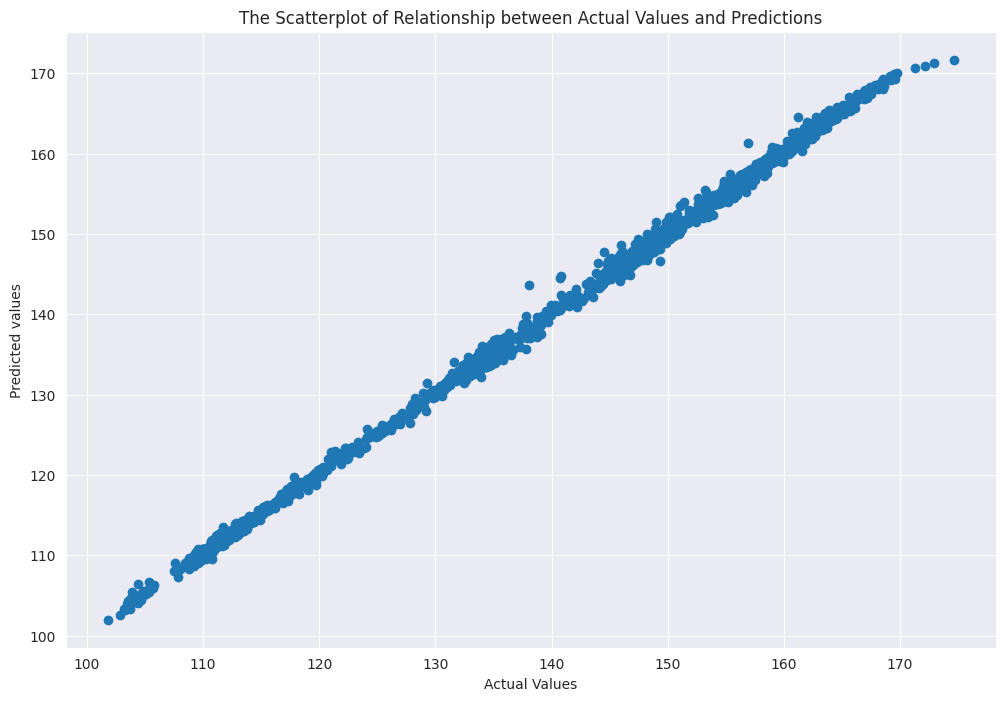

In [103]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])


In [104]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.42371110834973946
MSE: 0.3445712560461894
RMSE: 0.5870019216716325


In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled)
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 1ms/step
R2_score (train):  0.998753794764629
R2_score (test):  0.9986238596504871


In [106]:
#Evaluation of  the explained variance score (R^2)
print('This shows our model predict % {} of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2)))


This shows our model predict % 99.88 of the target correctly


## Residual Analysis

<Axes: ylabel='Density'>

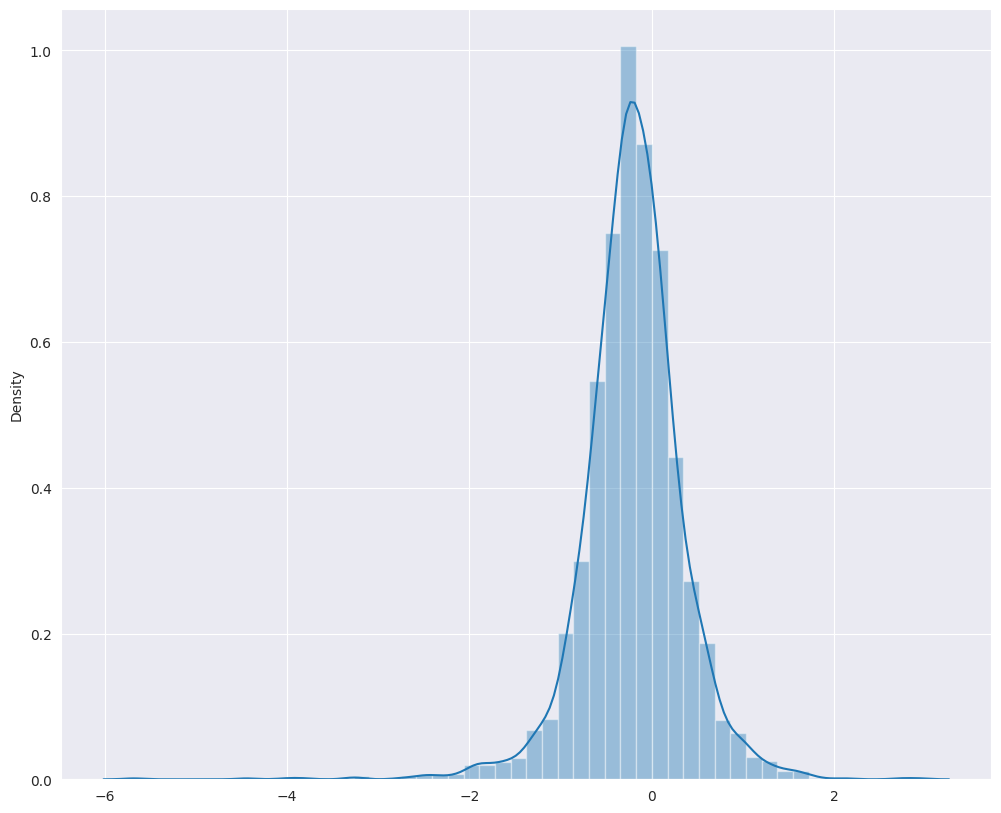

In [107]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data


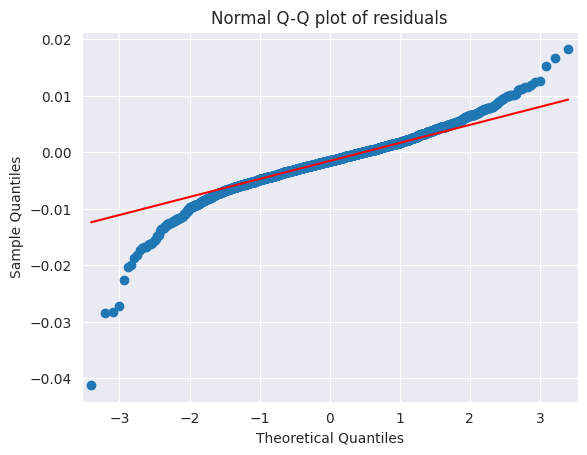

In [108]:
#Residuals values  = y - yhat
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

Observation: Error should have Normal / Gaussian distribution~N(0,1) and independently and identically distributed.